In [1]:
from dot_plots import *

plt.rcParams["figure.figsize"] = (7, 7)


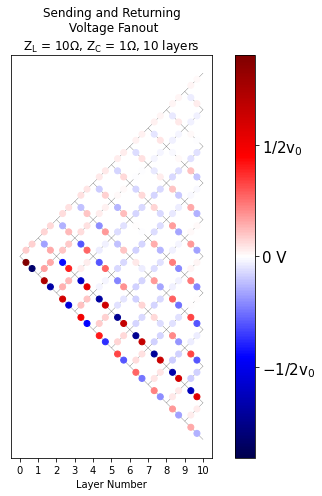

In [5]:
plot_sending_and_receiving('10','1',10,1,
                         False,
                         False,
                         True,'plots/')

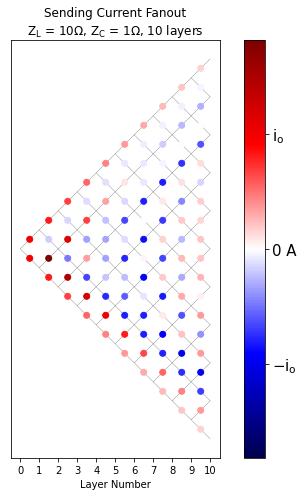

In [3]:
plot_sending_or_receiving('10','1',10,1,
                         False,
                         True,True,
                         False,'plots/')

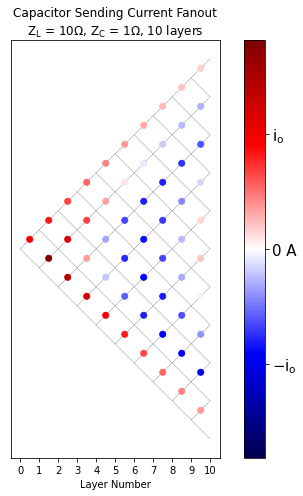

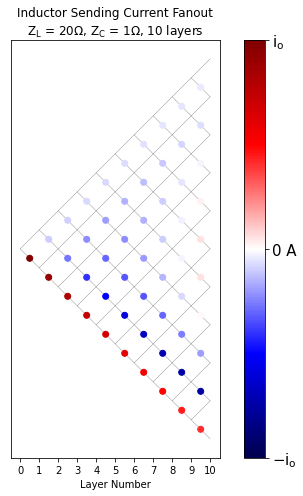

In [4]:
plot_single_transmission('10','1',10,1,
                         False,
                         True,True,True,
                         False,'plots/')
plot_single_transmission('20','1',10,1,
                         False,
                         False,True,True,
                         False,'plots/')